import all required libraries

In [17]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Sentiment labels are attached to movie reviews in the IMDB dataset.


## preprocessing of the dataset



The Preprocessing of the dataset involves turning every review into a series of word embeddings, where every word is represented by a fixed-size vector.

In [18]:
from keras.layers import Embedding
# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

Custom-trained embedding layer with training sample size = 100


In [19]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150



# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)

# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:10100]
y_train_data = y_train_data[10000:10100]




# import the library
from keras.models import Sequential
from keras.layers import Flatten, Dense

# create a model
model1 = Sequential()

# embedding layer
model1.add(Embedding(10000, 8, input_length=length))

# flatten the layer
model1.add(Flatten())

# output layer
model1.add(Dense(1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()


# fit the model
history1 = model1.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 3s 552ms/step - loss: 0.6931 - acc: 0.4900 - val_loss: 0.6937 - val_acc: 0.4942
Epoch 2/10
4/4 [==============================] - 2s 611ms/step - loss: 0.6698 - acc:

Plot the output

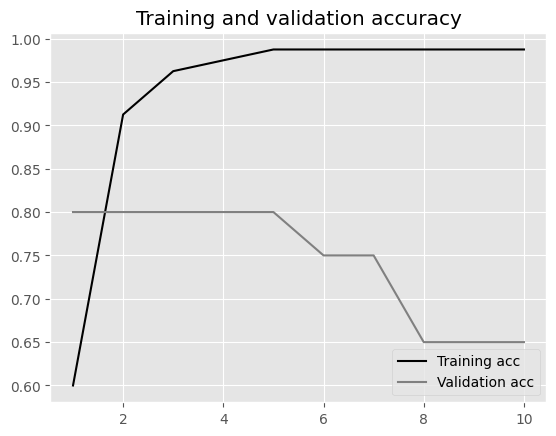

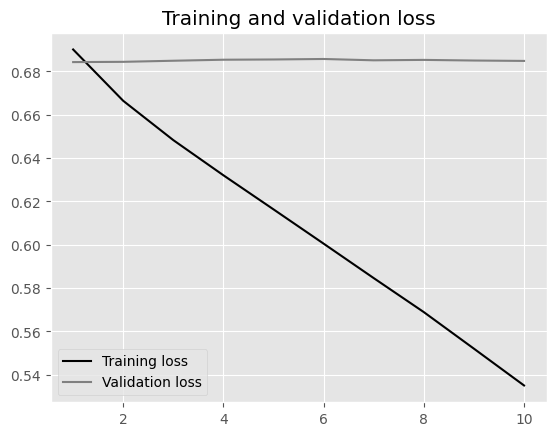

In [ ]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "black", label = "Training loss")
plt.plot(epochs, validation_loss, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [ ]:
# test the model
test_loss, test_acc = model1.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 1s 1ms/step - loss: 0.6942 - acc: 0.4960
Test loss: 0.6941630244255066
Test accuracy: 0.4959999918937683


## Custom-trained embedding layer with training sample size = 10000

In [ ]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 10000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:20000]
y_train_data = y_train_data[10000:20000]

Create a model


In [ ]:
# create a model
model2 = Sequential()

# add the embedding layer
model2.add(Embedding(10000, 8, input_length=length))

# flatten layer
model2.add(Flatten())

# output layer
model2.add(Dense(1, activation='sigmoid'))

# compile tyhe model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

# fit the model
history2 = model2.fit(x_train_data, y_train_data,
                    epochs=25,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            160000    
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 161201 (629.69 KB)
Trainable params: 161201 (629.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
250/250 [==============================] - 1s 4ms/step - loss: 0.6875 - acc: 0.5608 - val_loss: 0.6694 - val_acc: 0.6835
Epoch 2/25
250/250 [==============================] - 1s 3ms/step - loss: 0.5969 - acc: 0.7865 - val_loss: 0.5384 - val_acc: 0.7825
Epoch 3/25
250

Plot the output

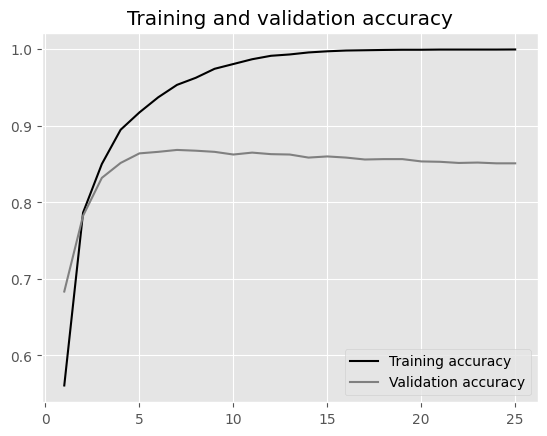

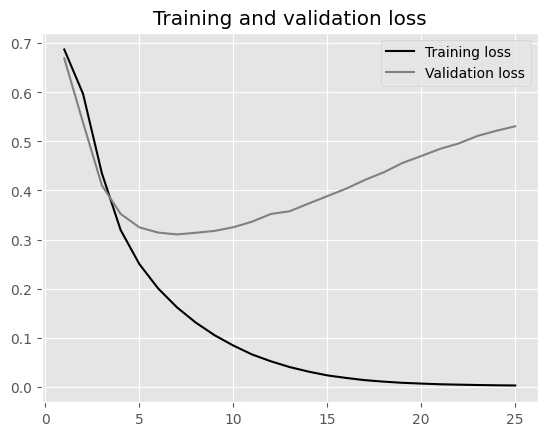

In [ ]:
# train accuracy
accuracy2 = history2.history['acc']
# validation accuracy
validation_accuracy2 = history2.history['val_acc']
# train loss
Train_loss2 = history2.history['loss']
# validation loss
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'black', label='Training loss')
plt.plot(epochs, validation_loss2, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 1s 1ms/step - loss: 0.5424 - acc: 0.8391
Test loss: 0.542425274848938
Test accuracy: 0.8391199707984924


 custom-trained embedding layer with training sample size = 5000

In [ ]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:15000]
y_train_data = y_train_data[10000:15000]

Create the model

In [ ]:
# create a model
model3 = Sequential()

# embedding layer
model3.add(Embedding(10000, 8, input_length=length))

# flatten layer
model3.add(Flatten())

# output layer
model3.add(Dense(1, activation='sigmoid'))

# compile the model
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

# fit the model
history3 = model3.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6915 - acc: 0.5303 - val_loss: 0.6872 - val_acc: 0.5940
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.6628 - acc: 0.7247 - val_loss: 0.6626 - val_acc: 0.6720
Epoch 3/20
125/1

Plot the output

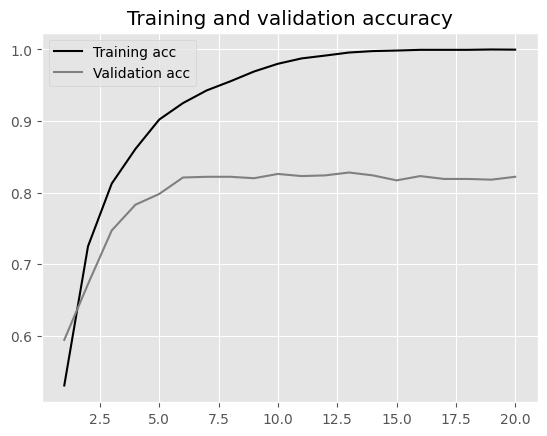

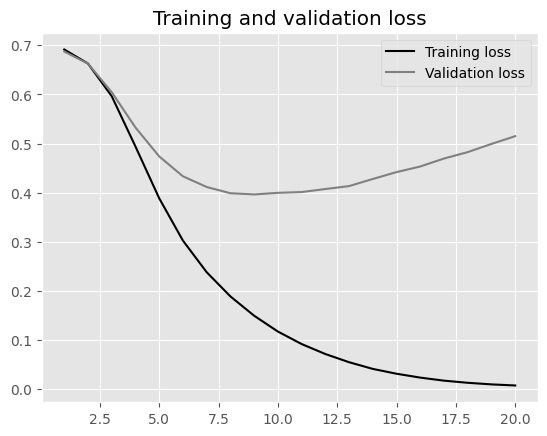

In [ ]:
# train accuracy
accuracy3 = history3.history["acc"]
# validation accuracy
validation_accuracy3 = history3.history["val_acc"]
# train loss
Train_loss3 = history3.history["loss"]
# validation loss
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "black", label = "Training loss")
plt.plot(epochs, validation_loss3, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [ ]:
# test the model
test_loss3, test_accuracy3 = model3.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.4547 - acc: 0.8264
Test loss: 0.45466774702072144
Test accuracy: 0.8264399766921997


## custom-trained embedding layer with training sample size = 2500

Split the data

In [ ]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:12500]
y_train_data = y_train_data[10000:12500]


create the model

In [ ]:
# create the model
model4 = Sequential()
# embedding layer
model4.add(Embedding(10000, 8, input_length=length))
# flatten the layer
model4.add(Flatten())
# output layer
model4.add(Dense(1, activation='sigmoid'))
# compile the output
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
# fit the model
history4 = model4.fit(x_train_data, y_train_data,
                    epochs=25,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
63/63 [==============================] - 1s 6ms/step - loss: 0.6928 - acc: 0.5050 - val_loss: 0.6928 - val_acc: 0.5220
Epoch 2/25
63/63 [==============================] - 0s 3ms/step - loss: 0.6749 - acc: 0.7280 - val_loss: 0.6913 - val_acc: 0.5280
Epoch 3/25
63/63 [==

Plot the graoh

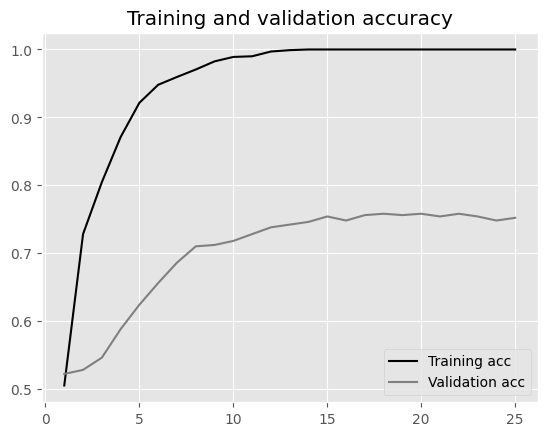

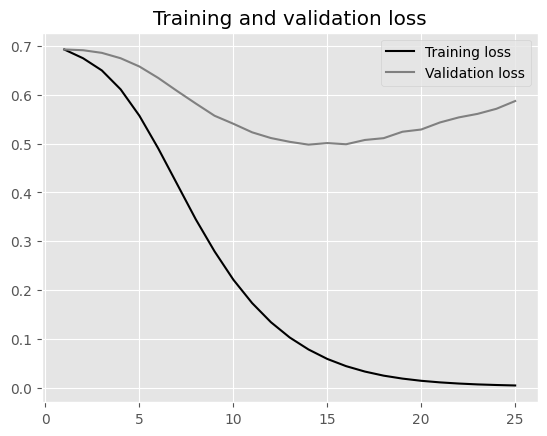

In [ ]:
# train accuracy
accuracy4 = history4.history["acc"]
# validation accuracy
validation_accuracy4 = history4.history["val_acc"]
# train losss
Train_loss4 = history4.history["loss"]
# validation loss
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "black", label = "Training loss")
plt.plot(epochs, validation_loss4, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the output

In [ ]:
# test the model
test_loss4, test_accuracy4 = model4.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 1s 1ms/step - loss: 0.5060 - acc: 0.7871
Test loss: 0.5059527158737183
Test accuracy: 0.78711998462677


## custom-trained embedding layer with training sample size = 1000

Split the model

In [ ]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:11000]
y_train_data = y_train_data[10000:11000]

create the model

In [ ]:
# create the model
model5 = Sequential()
# embedding layer
model5.add(Embedding(10000, 8, input_length=length))
# flatten the layer
model5.add(Flatten())
# output layer
model5.add(Dense(1, activation='sigmoid'))
# compile the output
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model5.summary()
# fit the model
history5 = model5.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
25/25 [==============================] - 1s 10ms/step - loss: 0.6940 - acc: 0.4900 - val_loss: 0.6930 - val_acc: 0.4900
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6772 - acc: 0.7350 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 3/30
25/25 [=

Plot the graph

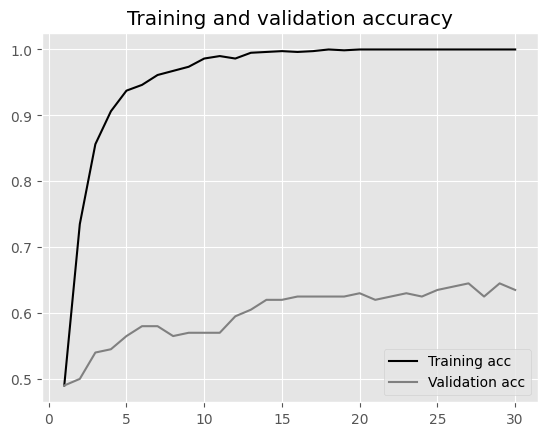

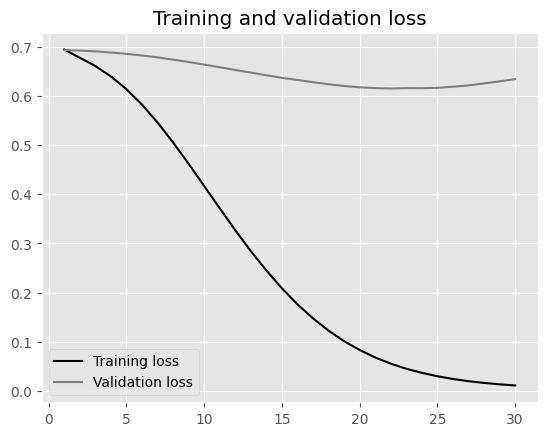

In [ ]:
# train accuracy
accuracy5 = history5.history["acc"]
# validation accuracy
validation_accuracy5 = history5.history["val_acc"]
# train losss
Train_loss5 = history5.history["loss"]
# validation loss
validation_loss5 = history5.history["val_loss"]

epochs = range(1, len(accuracy5) + 1)

plt.plot(epochs, accuracy5, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy5, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss5, "black", label = "Training loss")
plt.plot(epochs, validation_loss5, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# test the model
test_loss5, test_accuracy5 = model5.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss5)
print('Test accuracy:', test_accuracy5)

782/782 [==============================] - 1s 1ms/step - loss: 0.7085 - acc: 0.6254
Test loss: 0.7084777355194092
Test accuracy: 0.6253600120544434


out of all the model having training sample size 10000, performed well compared to remianing

## Custom-trained embedding layer with training sample size = 10000 and the top 20,000 words

In [20]:
# features are the number of words that should be considered
features = 20000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 10000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:20000]
y_train_data = y_train_data[10000:20000]

create the model

In [ ]:
# create the model
model6 = Sequential()
# embedding layer
model6.add(Embedding(20000, 8, input_length=length))
# flatten the layer
model6.add(Flatten())
# output layer
model6.add(Dense(1, activation='sigmoid'))
# compile the output
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model6.summary()
# fit the model
history6 = model6.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 8)            160000    
                                                                 
 flatten_5 (Flatten)         (None, 1200)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 161201 (629.69 KB)
Trainable params: 161201 (629.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
250/250 [==============================] - 1s 4ms/step - loss: 0.6875 - acc: 0.5686 - val_loss: 0.6699 - val_acc: 0.6740
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 0.5848 - acc: 0.7937 - val_loss: 0.5156 - val_acc: 0.8020
Epoch 3/30
250

Plot the output

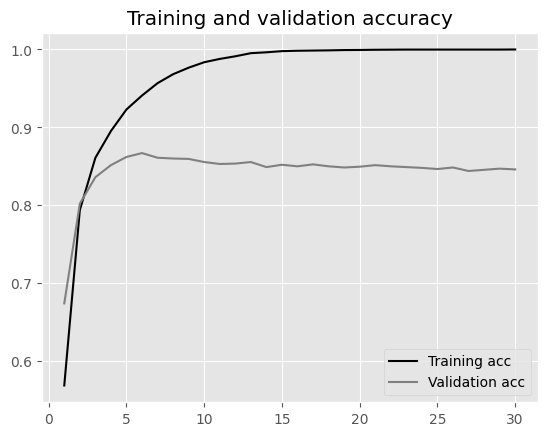

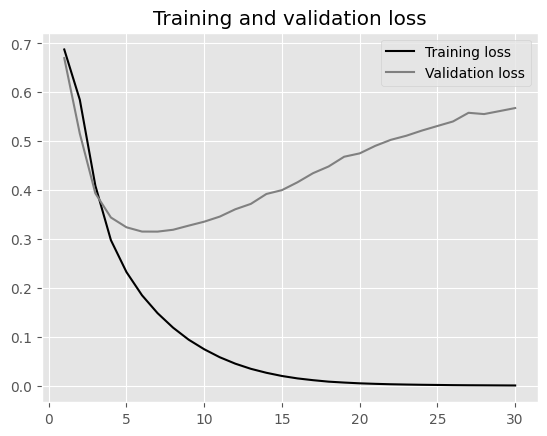

In [ ]:
# train accuracy
accuracy6 = history6.history["acc"]
# validation accuracy
validation_accuracy6 = history6.history["val_acc"]
# train losss
Train_loss6 = history6.history["loss"]
# validation loss
validation_loss6 = history6.history["val_loss"]

epochs = range(1, len(accuracy6) + 1)

plt.plot(epochs, accuracy6, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy6, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss6, "black", label = "Training loss")
plt.plot(epochs, validation_loss6, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

test the model

In [ ]:
# test the model
test_loss6, test_accuracy6 = model6.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss6)
print('Test accuracy:', test_accuracy6)

782/782 [==============================] - 1s 1ms/step - loss: 0.5675 - acc: 0.8412
Test loss: 0.5674799084663391
Test accuracy: 0.8412399888038635


In [1]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  27.0M      0  0:00:02  0:00:02 --:--:-- 27.0M


In [2]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Using Trained Word Embeds. If there is insufficient training data to generate word embeddings for the problem you want to solve, you can use pre-trained word embeddings.

## Tokenizing the data

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_data = data[:train_data] # (200, 100)
y_train_data = labels[:train_data] # shape (200,)
x_validation_data = data[train_data:train_data+valid_data] # shape (10000, 100)
y_validation_data = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


## Installing and setting up the GloVe word embedding for pretrained model

In [4]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We have trained 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.

## Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [5]:
# traing sample size=100
embedding_1 = 100

embedding_matrix = np.zeros((words, embedding_1))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

Create a model

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# create a model
model = Sequential()
# embedding layer
model.add(Embedding(words, embedding_1, input_length=length2))
# flatten layer
model.add(Flatten())
# dense layer
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                480032    
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Pretrained word embeddings are loaded into the Embeddig layer. When using the Embedding layer, setting this to False assures that it is not trainable. If you set trainable to True, the optimization approach may change the word embedding values. It is recommended to avoid updating pretrained areas while pupils are still being trained to prevent them from forgetting what they already "know".

Fit the model

In [24]:
# compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fir the model
history = model.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model1.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 0.7562 - acc: 0.4993 - val_loss: 0.6926 - val_acc: 0.5077
Epoch 2/20
313/313 [==============================] - 1s 5ms/step - loss: 0.6985 - acc: 0.4977 - val_loss: 0.6887 - val_acc: 0.5083
Epoch 3/20
313/313 [==============================] - 1s 5ms/step - loss: 0.6943 - acc: 0.5208 - val_loss: 0.6961 - val_acc: 0.5320
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 0.6784 - acc: 0.5642 - val_loss: 0.6049 - val_acc: 0.6559
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.6194 - acc: 0.6456 - val_loss: 0.5471 - val_acc: 0.6786
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 0.5354 - acc: 0.7218 - val_loss: 0.4773 - val_acc: 0.7443
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.4564 - acc: 0.7795 - val_loss: 0.3295 - val_acc: 0.8770
Epoch 8/20
313/313 [==============================] - 2s 8ms/step - loss: 0.

Given the limited amount of training data, it is evident that the model overfits quickly. This same mechanism is responsible for the wide range of validation accuracy.

Plot the output

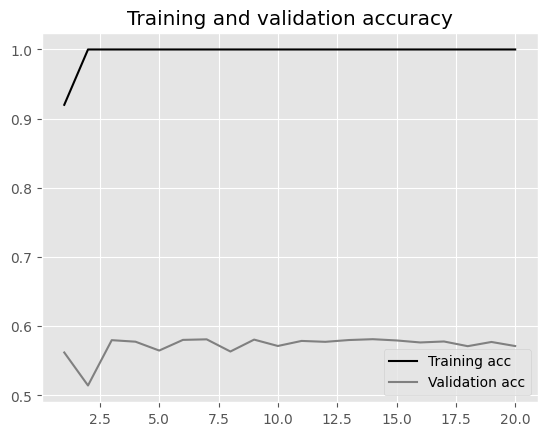

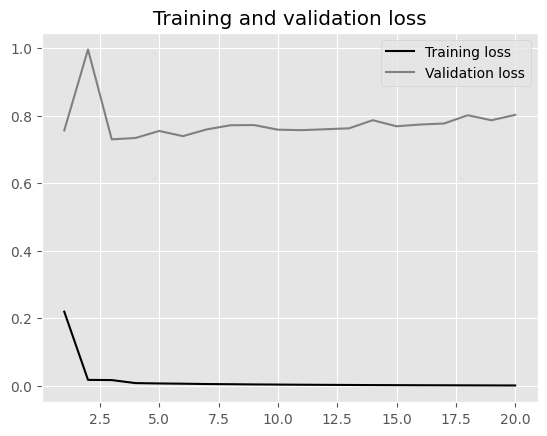

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'black', label='Training acc')
plt.plot(epochs, valid_accuracy, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'black', label='Training loss')
plt.plot(epochs, valid_loss, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test th model

In [ ]:
test_loss, test_accuracy= model.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.8506 - acc: 0.5064
Test loss: 0.8505766987800598
Test accuracy: 0.5064399838447571


## pretrained word embedding layer with training sample size = 10000

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length2 = 150
# training and validation data sample size
train_data = 10000 # Training sample is 10000
valid_data = 10000
# no.of words
words = 10000

# tokenizing the data
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# create the model
model11 = Sequential()
# embedding layer
model11.add(Embedding(words, embedd_di, input_length=length2))
# flatten layer
model11.add(Flatten())
# dense layer
model11.add(Dense(32, activation='relu'))
# output layer
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
# compile the model
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fit the model
history11 = model11.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model11.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                480032    
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 

Plot the output

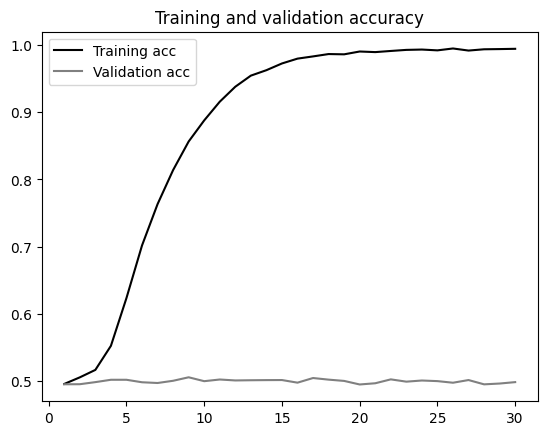

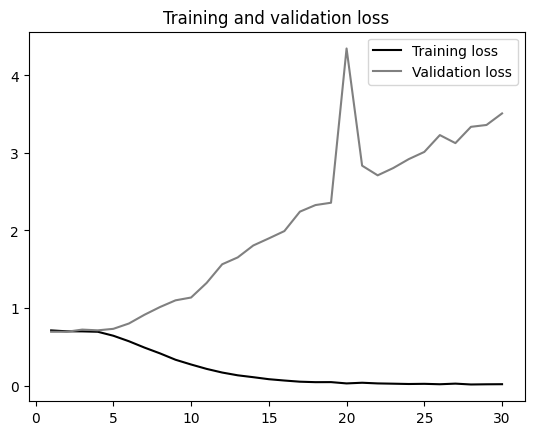

In [13]:
import matplotlib.pyplot as plt
# training accuracy
accuracy11 = history11.history['acc']
# validation accuracy
valid_acc11 = history11.history['val_acc']
# training loss
train_loss11 = history11.history['loss']
# validation loss
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'black', label='Training acc')
plt.plot(epochs, valid_acc11, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'black', label='Training loss')
plt.plot(epochs, valid_loss11, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [26]:
# test the model
test_loss11, test_accuracy11 = model11.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 3s 4ms/step - loss: 3.0757 - acc: 0.4990
Test loss: 3.0756659507751465
Test accuracy: 0.49904000759124756


## pretrained word embedding layer with training sample size = 5000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length = 150
# training sample size
train_data = 2500 #Trains on 2500 samples
# valiadtion sample size
valid_data = 10000
# no.of words
words = 10000

# tokenizing the data
tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedding_dim = 100

# create embedding matrix
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# create a model
model22 = Sequential()
# embedding layer
model22.add(Embedding(words, embedding_dim, input_length=length))
# flatten layer
model22.add(Flatten())
# dense layer
model22.add(Dense(32, activation='relu'))
# output layer
model22.add(Dense(1, activation='sigmoid'))
model22.summary()

model22.layers[0].set_weights([embedding_matrix])
model22.layers[0].trainable = False

# compile the model
model22.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# fit the model
history22 = model22.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model22.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_22 (Flatten)        (None, 15000)             0         
                                                                 
 dense_26 (Dense)            (None, 32)                480032    
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
79/79 [==============================] - 3

Plot the output

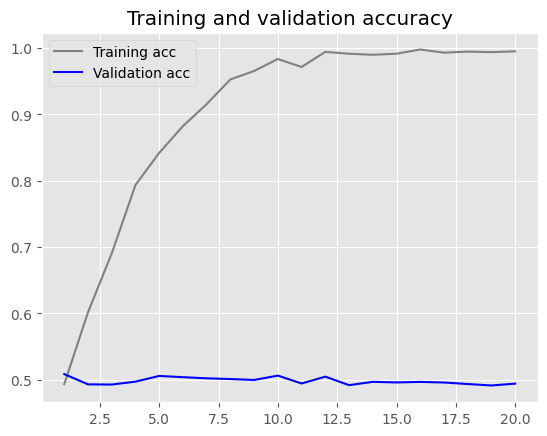

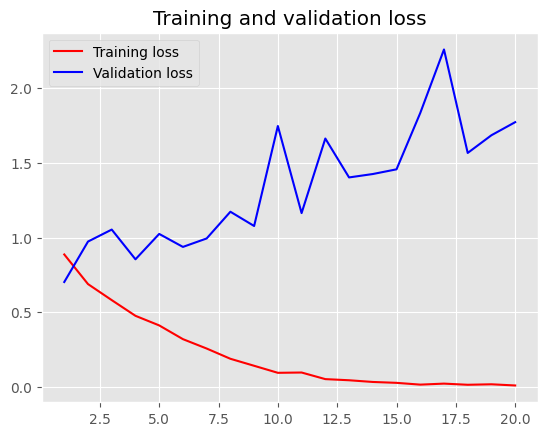

In [ ]:
import matplotlib.pyplot as plt
# tarining accuracy
accuracy22 = history22.history['acc']
# validation accuracy
validation_accuracy22 = history22.history['val_acc']
# training loss
loss22 = history22.history['loss']
# validation loss
validation_loss22 = history22.history['val_loss']

epochs = range(1, len(accuracy22) + 1)

plt.plot(epochs, accuracy22, 'grey', label='Training acc')
plt.plot(epochs, validation_accuracy22, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss22, 'red', label='Training loss')
plt.plot(epochs, validation_loss22, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [ ]:
test_loss22, test_accuracy22 = model22.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss22)
print('Test accuracy:', test_accuracy22)

782/782 [==============================] - 3s 4ms/step - loss: 1.7040 - acc: 0.5038
Test loss: 1.704003095626831
Test accuracy: 0.5038400292396545


## pretrained word embedding layer with training sample size = 2500

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length = 150
# training data size
train_data = 2500 # Trains on 10000 samples
# validation data size
valid_data = 10000
# 10000 words from vocab
words = 10000


# tokenizing the data
tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# splitting the data
x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedding_dim = 100

# embedding matrix
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


create a model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# create a model
model33 = Sequential()
# embedding layer
model33.add(Embedding(words, embedding_dim, input_length=length))
# flatten layer
model33.add(Flatten())
# dense layer
model33.add(Dense(32, activation='relu'))
# output layer
model33.add(Dense(1, activation='sigmoid'))
model33.summary()

model33.layers[0].set_weights([embedding_matrix])
model33.layers[0].trainable = False
# compile the model
model33.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fit the model
history33 = model33.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model33.save_weights('pre_trained_glove_model.h5')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_24 (Flatten)        (None, 15000)             0         
                                                                 
 dense_30 (Dense)            (None, 32)                480032    
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
79/79 [==============================] - 2s 12ms/step - loss: 0.8573 - acc: 0.5000 - val_loss: 0.7666 - val_acc: 0.4983
Epoch 2/20
79/79

Plot the output

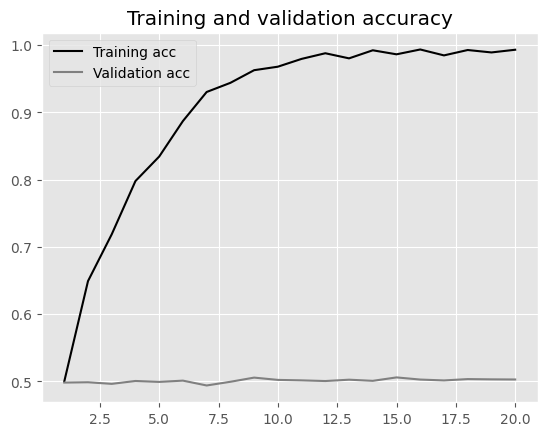

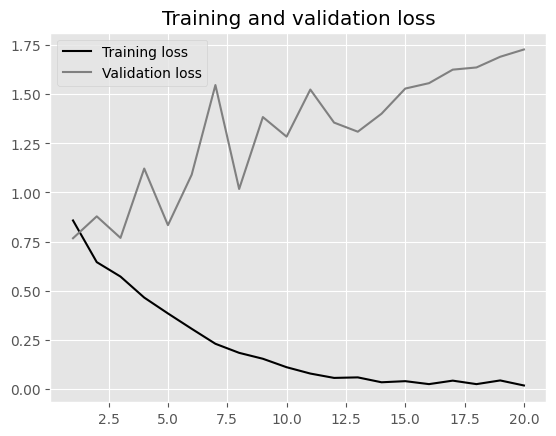

In [ ]:
# training accuracy
accuracy33 = history33.history['acc']
# validation accuracy
validation_accuracy33 = history33.history['val_acc']
# tarining loss
loss33 = history33.history['loss']
# validation loss
validation_loss33 = history33.history['val_loss']

epochs = range(1, len(accuracy33) + 1)

plt.plot(epochs, accuracy33, 'black', label='Training acc')
plt.plot(epochs, validation_accuracy33, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss33, 'black', label='Training loss')
plt.plot(epochs, validation_loss33, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [ ]:
test_loss33, test_accuracy33 = model33.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss33)
print('Test accuracy:', test_accuracy33)

782/782 [==============================] - 4s 5ms/step - loss: 1.6859 - acc: 0.5036
Test loss: 1.6859482526779175
Test accuracy: 0.5036399960517883


## pretrained word embedding layer with training sample size = 1000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length = 150
# training data size
train_data = 1000 # Trains on 1000 samples
# validation data size
valid_data = 10000
# 10000 words from vocab
words = 10000


# tokenizing the data
tokenizer5 = Tokenizer(num_words=words)
tokenizer5.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# splitting the data
x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedding_dim = 100

# embedding matrix
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


create the model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# create a model
model44 = Sequential()
# embedding layer
model44.add(Embedding(words, embedding_dim, input_length=length))
# flatten layer
model44.add(Flatten())
# dense layer
model44.add(Dense(32, activation='relu'))
# output layer
model44.add(Dense(1, activation='sigmoid'))
model44.summary()

model44.layers[0].set_weights([embedding_matrix])
model44.layers[0].trainable = False
# compile the model
model44.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fit the model
history44 = model44.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model44.save_weights('pre_trained_glove_model.h5')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_26 (Flatten)        (None, 15000)             0         
                                                                 
 dense_34 (Dense)            (None, 32)                480032    
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 1s 25ms/step - loss: 0.9680 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5090
Epoch 2/30
32/32

Plot the output

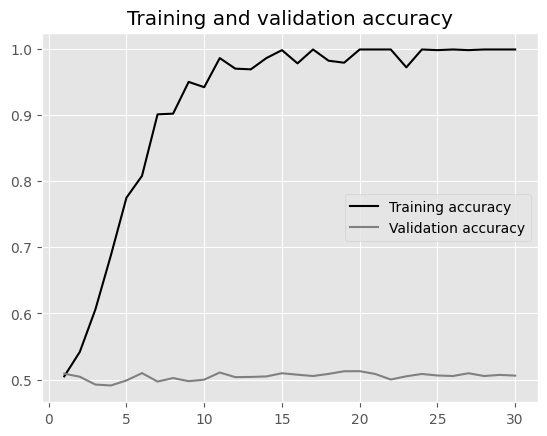

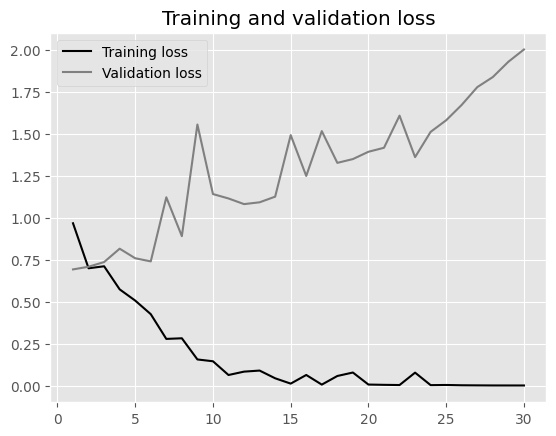

In [ ]:
# training accuracy
accuracy44 = history44.history['acc']
# validation accuracy
validation_accuracy44 = history44.history['val_acc']
# tarining loss
loss44 = history44.history['loss']
# validation loss
validation_loss44 = history44.history['val_loss']

epochs = range(1, len(accuracy44) + 1)

plt.plot(epochs, accuracy44, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy44, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss44, 'black', label='Training loss')
plt.plot(epochs, validation_loss44, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [ ]:
test_loss44, test_accuracy44 = model44.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss44)
print('Test accuracy:', test_accuracy44)

782/782 [==============================] - 3s 4ms/step - loss: 2.0495 - acc: 0.4940
Test loss: 2.0495152473449707
Test accuracy: 0.4939599931240082
